# **Intro to pandas**

## Basic Concepts

The following line imports the *pandas* API and prints the API version:

In [1]:
## import the libraries for data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## check the version of pandas
pd.__version__

'1.4.4'

The primary data structures in *pandas* are implemented as two classes:

  * **`DataFrame`**, which you can imagine as a relational data table, with rows and named columns.
  * **`Series`**, which is a single column. A `DataFrame` contains one or more `Series` and a name for each `Series`.

The data frame is a commonly used abstraction for data manipulation. Similar implementations exist in [Spark](https://spark.apache.org/) and [R](https://www.r-project.org/about.html).

One way to create a `Series` is to construct a `Series` object. For example:

In [3]:
## a list of cities
['San Francisco', 'San Jose', 'Sacramento']

['San Francisco', 'San Jose', 'Sacramento']

In [4]:
## series of cities
pd.Series(['San Francisco', 'San Jose', 'Sacramento'])

0    San Francisco
1         San Jose
2       Sacramento
dtype: object

`DataFrame` objects can be created by passing a `dict` mapping `string` column names to their respective `Series`. If the `Series` don't match in length, missing values are filled with special [NA/NaN](http://pandas.pydata.org/pandas-docs/stable/missing_data.html) values. Example:

In [5]:
## generating two pandas serieses
city_names = pd.Series(['San Francisco', 'San Jose', 'Sacramento'])
population = pd.Series([852469, 1015785, 485199])

In [6]:
{'city_names':city_names, 'Populaton':population}

{'city_names': 0    San Francisco
 1         San Jose
 2       Sacramento
 dtype: object,
 'Populaton': 0     852469
 1    1015785
 2     485199
 dtype: int64}

In [7]:
pd.DataFrame({ 'City name': city_names, 'Population': population })

,City name,Population
0,San Francisco,852469
1,San Jose,1015785
2,Sacramento,485199


But most of the time, you load an entire file into a `DataFrame`. The following example loads a file with California housing data. Run the following cell to load the data and create feature definitions:

In [8]:
## read in the data from the url using pandas 'read_csv'
cal_hous_df = pd.read_csv("california_housing_train.csv", sep=",")

The example above used `DataFrame.describe` to show interesting statistics about a `DataFrame`. Another useful function is `DataFrame.head`, which displays the first few records of a `DataFrame`:

In [9]:
## display the first five rows
cal_hous_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15,5612,1283,1015,472,1.4936,66900
1,-114.47,34.40,19,7650,1901,1129,463,1.8200,80100
2,-114.56,33.69,17,720,174,333,117,1.6509,85700
3,-114.57,33.64,14,1501,337,515,226,3.1917,73400
4,-114.57,33.57,20,1454,326,624,262,1.9250,65500


In [10]:
cal_hous_df['pop_1000'] =cal_hous_df['population']/1000

In [11]:
cal_hous_df['log_price'] = np.log(cal_hous_df['housing_median_age'])

array([[<AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

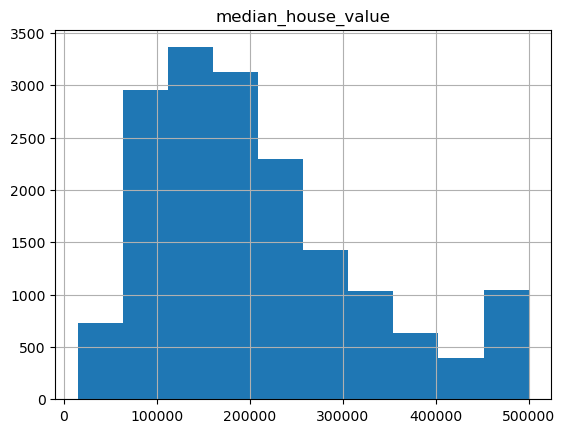

In [12]:
cal_hous_df.hist(['median_house_value'])

array([[<AxesSubplot:title={'center':'log_price'}>]], dtype=object)

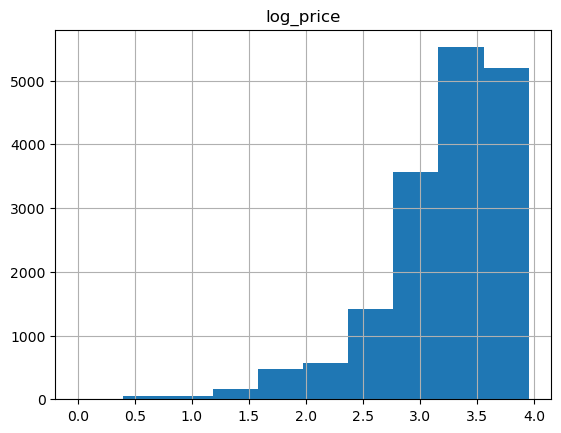

In [13]:
cal_hous_df.hist(['log_price'])

In [14]:
## look a the types of data
cal_hous_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  int64  
 3   total_rooms         17000 non-null  int64  
 4   total_bedrooms      17000 non-null  int64  
 5   population          17000 non-null  int64  
 6   households          17000 non-null  int64  
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  int64  
 9   pop_1000            17000 non-null  float64
 10  log_price           17000 non-null  float64
dtypes: float64(5), int64(6)
memory usage: 1.4 MB


In [15]:
cal_hous_df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
pop_1000              0
log_price             0
dtype: int64

In [16]:
## the basic statistics for numerical columns in the dataset
cal_hous_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
longitude,17000.0,-119.562108,2.005166,-124.3500,-121.790000,-118.490000,-118.000000,-114.310000
latitude,17000.0,35.625225,2.137340,32.5400,33.930000,34.250000,37.720000,41.950000
housing_median_age,17000.0,28.589353,12.586937,1.0000,18.000000,29.000000,37.000000,52.000000
total_rooms,17000.0,2643.664412,2179.947071,2.0000,1462.000000,2127.000000,3151.250000,37937.000000
total_bedrooms,17000.0,539.410824,421.499452,1.0000,297.000000,434.000000,648.250000,6445.000000
population,17000.0,1429.573941,1147.852959,3.0000,790.000000,1167.000000,1721.000000,35682.000000
households,17000.0,501.221941,384.520841,1.0000,282.000000,409.000000,605.250000,6082.000000
median_income,17000.0,3.883578,1.908157,0.4999,2.566375,3.544600,4.767000,15.000100
median_house_value,17000.0,207300.912353,115983.764387,14999.0000,119400.000000,180400.000000,265000.000000,500001.000000
pop_1000,17000.0,1.429574,1.147853,0.0030,0.790000,1.167000,1.721000,35.682000


Another powerful feature of *pandas* is graphing. For example, `DataFrame.hist` lets you quickly study the distribution of values in a column:

array([[<AxesSubplot:title={'center':'housing_median_age'}>]],
      dtype=object)

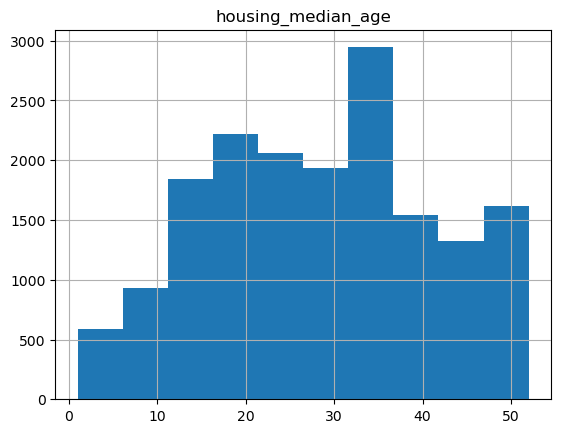

In [17]:
## generate a histgram for the housing_median_age' column
cal_hous_df.hist('housing_median_age')

In [18]:
cal_hous_df['housing_median_age'].value_counts().sort_values(ascending=False)[:5]

52    1052
36     715
35     692
16     635
17     576
Name: housing_median_age, dtype: int64

## Accessing Data

You can access `DataFrame` data using familiar Python dict/list operations:

In [19]:
cities = pd.DataFrame({ 'City name': city_names, 'Population': population })
print(type(cities['City name']))
cities['City name']

<class 'pandas.core.series.Series'>


0    San Francisco
1         San Jose
2       Sacramento
Name: City name, dtype: object

In [20]:
cities

,City name,Population
0,San Francisco,852469
1,San Jose,1015785
2,Sacramento,485199


In [21]:
print(type(cities['City name'][1]))
cities['City name'][1]

<class 'str'>


'San Jose'

In [22]:
print(type(cities[0:2]))
cities[0:2]

<class 'pandas.core.frame.DataFrame'>


,City name,Population
0,San Francisco,852469
1,San Jose,1015785


In addition, *pandas* provides an extremely rich API for advanced [indexing and selection](http://pandas.pydata.org/pandas-docs/stable/indexing.html) that is too extensive to be covered here.

## Manipulating Data

You may apply Python's basic arithmetic operations to `Series`. For example:

In [23]:

population / 1000.

0     852.469
1    1015.785
2     485.199
dtype: float64

NumPyis a popular toolkit for scientific computing. *pandas* `Series` can be used as arguments to most NumPy functions:

In [24]:
import numpy as np

np.log(population)

0    13.655892
1    13.831172
2    13.092314
dtype: float64

For more complex single-column transformations, you can use `Series.apply`. Like the Python

The example below creates a new `Series` that indicates whether `population` is over one million:

In [25]:
population.apply(lambda val: val > 1000000)

0    False
1     True
2    False
dtype: bool


Modifying `DataFrames` is also straightforward. For example, the following code adds two `Series` to an existing `DataFrame`:

In [26]:
cities['Area square miles'] = pd.Series([46.87, 176.53, 97.92])
cities['Population density'] = cities['Population'] / cities['Area square miles']
cities

,City name,Population,Area square miles,Population density
0,San Francisco,852469,46.87,18187.945381
1,San Jose,1015785,176.53,5754.177760
2,Sacramento,485199,97.92,4955.055147


## Exercise #1

Modify the `cities` table by adding a new boolean column that is True if and only if *both* of the following are True:

  * The city is named after a saint.
  * The city has an area greater than 50 square miles.

**Note:** Boolean `Series` are combined using the bitwise, rather than the traditional boolean, operators. For example, when performing *logical and*, use `&` instead of `and`.


In [27]:
cities['Is wide and has saint name'] = (cities['Area square miles'] > 50) & cities['City name'].apply(lambda name: name.startswith('San'))
cities

,City name,Population,Area square miles,Population density,Is wide and has saint name
0,San Francisco,852469,46.87,18187.945381,False
1,San Jose,1015785,176.53,5754.177760,True
2,Sacramento,485199,97.92,4955.055147,False


## Indexes
Both `Series` and `DataFrame` objects also define an `index` property that assigns an identifier value to each `Series` item or `DataFrame` row.

By default, at construction, *pandas* assigns index values that reflect the ordering of the source data. Once created, the index values are stable; that is, they do not change when data is reordered.

In [28]:
city_names.index

RangeIndex(start=0, stop=3, step=1)

In [29]:
cities.index

RangeIndex(start=0, stop=3, step=1)

Call `DataFrame.reindex` to manually reorder the rows. For example, the following has the same effect as sorting by city name:

In [30]:
cities.reindex([2, 0, 1])

,City name,Population,Area square miles,Population density,Is wide and has saint name
2,Sacramento,485199,97.92,4955.055147,False
0,San Francisco,852469,46.87,18187.945381,False
1,San Jose,1015785,176.53,5754.177760,True


Reindexing is a great way to shuffle (randomize) a `DataFrame`. In the example below, we take the index, which is array-like, and pass it to NumPy's `random.permutation` function, which shuffles its values in place. Calling `reindex` with this shuffled array causes the `DataFrame` rows to be shuffled in the same way.
Try running the following cell multiple times!

In [31]:
cities.reindex(np.random.permutation(cities.index))

,City name,Population,Area square miles,Population density,Is wide and has saint name
0,San Francisco,852469,46.87,18187.945381,False
2,Sacramento,485199,97.92,4955.055147,False
1,San Jose,1015785,176.53,5754.177760,True


## Exercise #2

The `reindex` method allows index values that are not in the original `DataFrame`'s index values. Try it and see what happens if you use such values! Why do you think this is allowed?

In [32]:
# Your code here

### Solution

Click below for the solution.

If your `reindex` input array includes values not in the original `DataFrame` index values, `reindex` will add new rows for these "missing" indices and populate all corresponding columns with `NaN` values:

In [33]:
cities.reindex([0, 4, 5, 2])

,City name,Population,Area square miles,Population density,Is wide and has saint name
0,San Francisco,852469.0,46.87,18187.945381,False
4,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN
2,Sacramento,485199.0,97.92,4955.055147,False


## **Home Work**

1. Are there any highly corelated variables/columns?
(hint generate  correlation matrix and heatmap for the dataframe)


yes there are, the values close to 1 indicates a strong positive corelation, the values close to -1 indicates a strong negative corelation and the values close to 0 indicates a weak or nul corelation.

In [34]:
corr_mat = cities.corr().round(2)
corr_mat

,Population,Area square miles,Population density,Is wide and has saint name
Population,1.00,0.41,0.27,0.74
Area square miles,0.41,1.00,-0.77,0.92
Population density,0.27,-0.77,1.00,-0.45
Is wide and has saint name,0.74,0.92,-0.45,1.00


<AxesSubplot:>

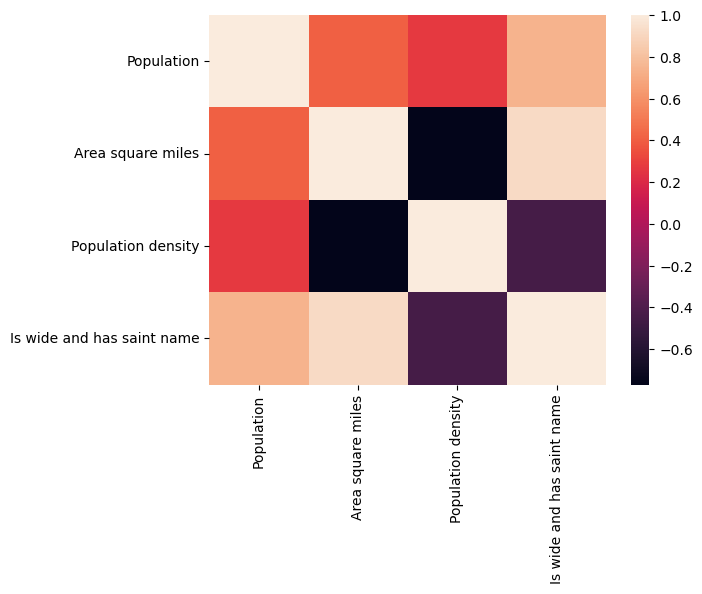

In [35]:
sns.heatmap(corr_mat)